# Lab 3: Frequency Analysis using FFT

## Jade Cutter and Christian Lancaster

### EE 341, Summer 2020

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.io.wavfile as wav
import simpleaudio as sa

## Task 1: Using the FFT function
We show an example how to compute the unshifted DFT and shifted DFT.

Text(0, 0.5, 'Amplitude')

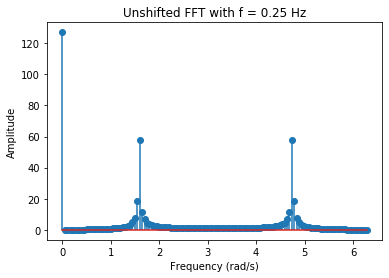

In [2]:
# Example: Unshifted DFT

# define the frequency = 0.25
f = 0.25

# 0 <= n < 128
n = np.arange(0, 127, 1)

# the signal shown in the handout
x = 1 + np.cos(2 * np.pi * f * n)

# compute unshifted DFT of array x
x_fft = fftpack.fft(x)

# the indices of the output correspond to the range 0<= w < 2* np.pi
w_fft = np.linspace(0, 2 * np.pi, len(n))

# plot the result
magnitude = np.abs(x_fft)
plt.stem(w_fft, magnitude, use_line_collection=True)
plt.title('Unshifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

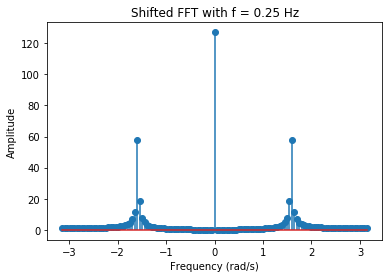

In [3]:
# Example: Shifted DFT

# To compute the shifted DFT, you can use the following command:
x_fftshift = fftpack.fftshift(x_fft)

# the indices correspond to the range -np.pi <= w < np.pi
w_fftshift = np.linspace(-np.pi, np.pi, len(n))

# plot the result
magnitude = np.abs(x_fftshift)
plt.stem(w_fftshift, magnitude, use_line_collection=True)
plt.title('Shifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

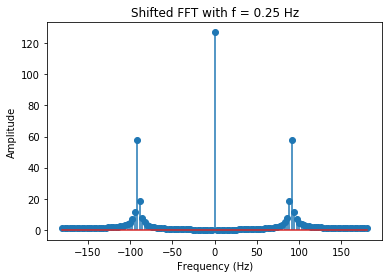

In [4]:
w_fftshift_hertz = np.linspace(-180, 180, len(n))
plt.stem(w_fftshift_hertz, magnitude, use_line_collection=True)
plt.title('Shifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

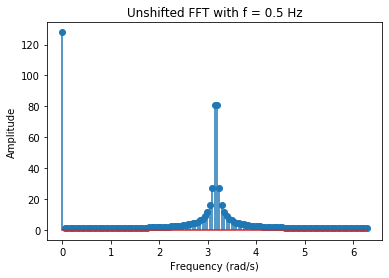

In [5]:
f = 0.5
x = 1 + np.cos(2 * np.pi * f * n)
x_fft = fftpack.fft(x)
magnitude = np.abs(x_fft)
plt.stem(w_fft, magnitude, use_line_collection=True)
plt.title('Unshifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

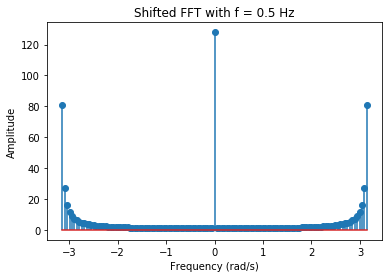

In [6]:
x_fftshift = fftpack.fftshift(x_fft)
magnitude = np.abs(x_fftshift)
plt.stem(w_fftshift, magnitude, use_line_collection=True)
plt.title('Shifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

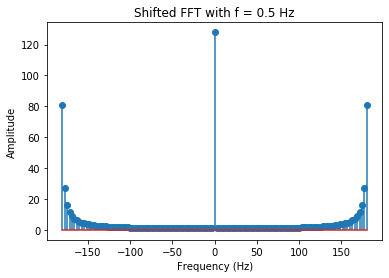

In [7]:
plt.stem(w_fftshift_hertz, magnitude, use_line_collection=True)
plt.title('Shifted FFT with f = {} Hz'.format(f))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

### Discussion 1

#### Problems Encountered
No problems were encountered in this section; the instructions and the given templates were very clear.

#### Results
We were able to successfully follow the example that was provided in this notebook template.

#### Implementation Details
We made a linspace for the Hertz, from -180 to 180 with 128 samples. We then took the existing magnitude (using the abs() function) of the Fast Fourier Transform (FFT) shift of the FFT of the function. The Hertz linspace is just for plotting, and the shift made sure we are looking at the function centered about the origin. We did the same steps for frequencies 0.25 and 0.5 radians/second.

#### Q: Why do the frequency peak locations make sense?
The peak locations and heights represent the value of the fourier transform function. The fourier transform takes a function in the time domain and represents it in the frequency domain as it's sinusoidal components. Therefore, when we change the value of f, we change the value of the sinusoidal component frequency peaks. For example, when f is 0.5, you would see peaks at the integer multiples of pi radians.


## Task 2: Frequency Shifting
We show an example of computing FFT with sinc, by evaluating different sequences and plotting the results.

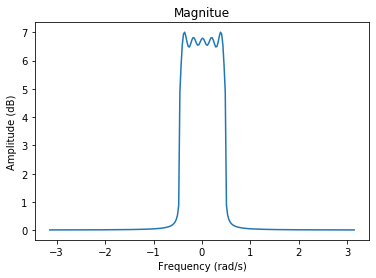

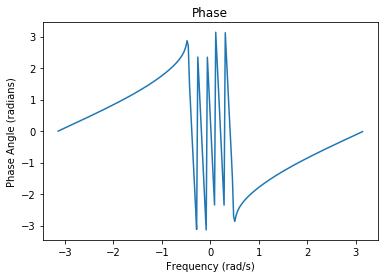

In [33]:
# we have the following definition
f1 = 0.15
n = np.arange(0, 256) # 0<= n < 256
w_fftshift = np.linspace(-np.pi, np.pi, len(n)) # range: -np.pi <= w < np.pi
x1 = np.sinc(f1 * (n - 32)) # x1[n] as shown in the handout

# First, we compute unshifted DFT of x1[n]
x1_fft = fftpack.fft(x1)
# Then, we compute the shifted DFT by
x1_fftshift = fftpack.fftshift(x1_fft)

# plot the result
plt.figure()
magnitue = np.abs(x1_fftshift)
plt.plot(w_fftshift, magnitue)
plt.xlabel('Frequency (rad/s)')   
plt.ylabel('Amplitude (dB)')
plt.title('Magnitue')
plt.figure()
phase = np.angle(x1_fftshift)
plt.plot(w_fftshift, phase)
plt.xlabel('Frequency (rad/s)')   
plt.ylabel('Phase Angle (radians)')
plt.title('Phase')
plt.show()

In [38]:
def show_mag_and_phase(x): 
    x_fft = fftpack.fft(x)
    x_fftshift = fftpack.fftshift(x_fft)
    n = np.arange(0, 256) # 0<= n < 256
    w_fftshift = np.linspace(-np.pi, np.pi, len(n))
    magnitude = np.abs(x_fftshift)
    phase = np.angle(x_fftshift)

    plt.figure()
    plt.plot(w_fftshift, magnitude)
    plt.title('Magnitude')
    plt.xlabel('Frequency (rad/s)')   
    plt.ylabel('Amplitude (dB)')
    plt.figure()
    plt.plot(w_fftshift, phase)
    plt.title('Phase')
    plt.xlabel('Frequency (rad/s)')   
    plt.ylabel('Phase Angle (radians)')
    plt.show()

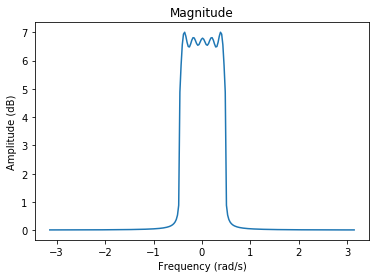

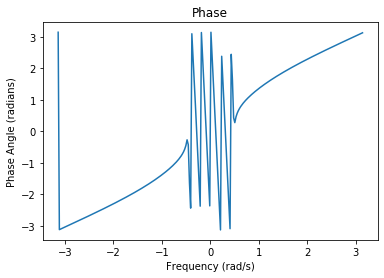

In [39]:
x2 = np.sinc(f1 * (n - 32)) * -1 ** n
show_mag_and_phase(x2)

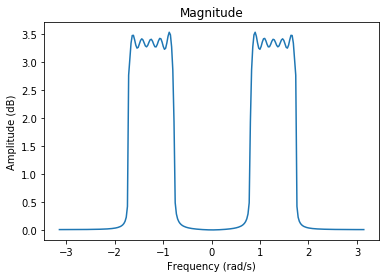

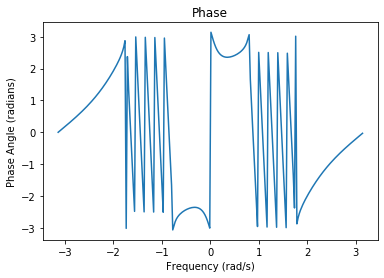

In [40]:
f2 = 0.2
x3 = np.sinc(f1 * (n - 32)) * np.cos(2 * np.pi * f2 * n)
show_mag_and_phase(x3)

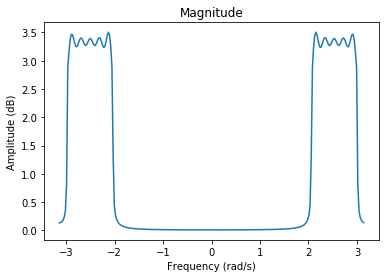

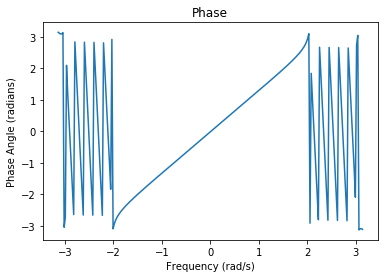

In [43]:
f3 = 0.4
x4 = np.sinc(f1 * (n - 32)) * np.cos(2 * np.pi * f3 * n)
show_mag_and_phase(x4)

### Discussion 2
#### Problems Encountered
No problems encountered in this section; the instructions and the given templates were very clear.
#### Results
We were able to plot the fourier transforms of the provided functions on using matplotlib.
#### Implementation Details
For this task, we chose to define a function to perform the requisite task for each of the given sinc functions. The function takes in as argument a discrete value function, and returns a plot of that function.

#### Q1: What type of filter does each correspond to?
$x_1$ and $x_2$ correspond to low pass filters, where $x_2$ is sharper. $x_3$ and $x_4$ correspond to bandpass filters.

#### Q2: Why does the fourth signal not have a flat frequency response in the passband?
The fourth signal does not have a flat frequency response in the passband because the frequency shift is being applied to a sinc signal, which itself does not have a flat frequency response in it's own passband.

## Task 3: Starting from Continuous Time Signals
This is an example of loading the music flle and computing FFT. Please download the music files from Canvas.

In [14]:
# Load a WAV file. 
# Return the sampling rate and the sample array. 
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wav.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

sampling rate =  22050
number of samples =  16609


Text(0, 0.5, 'Amplitude')

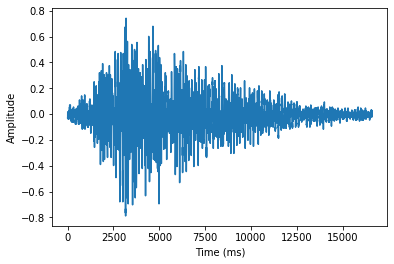

In [44]:
# We load a WAV file, and display the signal in time domain
sr, samples = wav_load("tiger_fixed.wav")
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')   
plt.ylabel('Amplitude')


Text(0, 0.5, 'Amplitude')

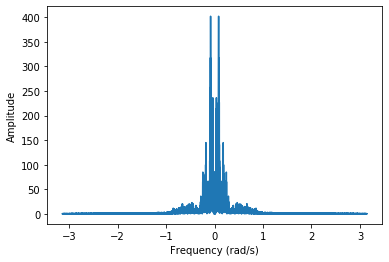

In [45]:
# Now, we compute shifted DFT just like in Task 1 and Task 2
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

## Sample 1

sampling rate =  22050
number of samples =  14707


Text(0, 0.5, 'Amplitude')

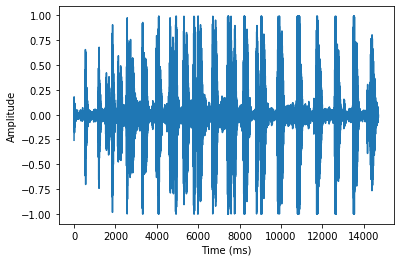

In [53]:
sr, samples = wav_load("toad_fixed.wav")

sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')   
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

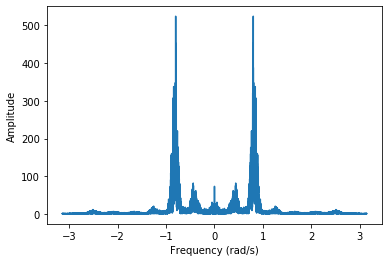

In [54]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

## Sample 2

sampling rate =  22050
number of samples =  25917


Text(0, 0.5, 'Amplitude')

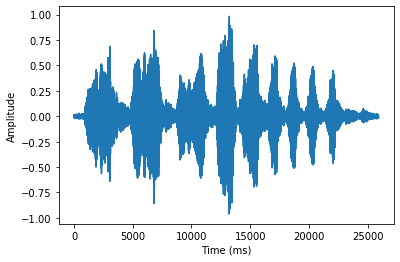

In [19]:
sr, samples = wav_load("blm.wav")
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

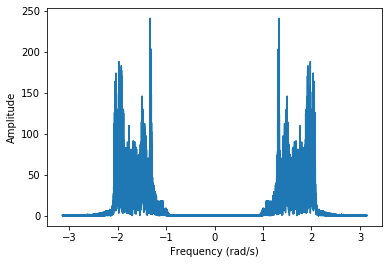

In [20]:
# Now, we compute shifted DFT just like in Task 1 and Task 2
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### Part A: Sample 1 (Toad)

sampling rate =  22050
number of samples =  14707


Text(0, 0.5, 'Amplitude')

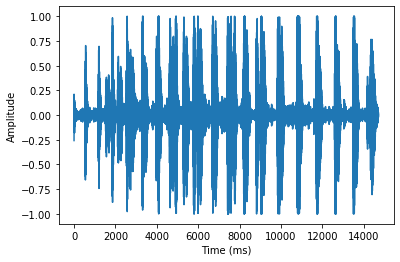

In [46]:
sr, samples = wav_load("toad_fixed.wav")
n = np.arange(0, len(samples))
samples = samples * np.cos(2 * np.pi * 0.5 * n)
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')   
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

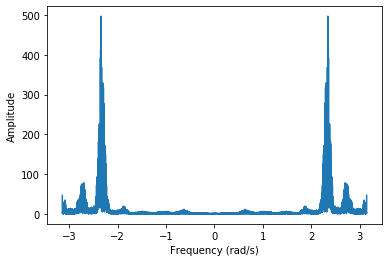

In [47]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### Part A: Sample 2 (BLM)

sampling rate =  22050
number of samples =  25917


Text(0, 0.5, 'Amplitude')

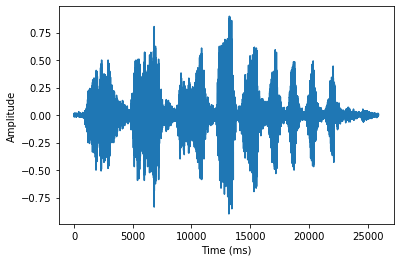

In [66]:
sr, samples = wav_load("blm.wav")
n = np.arange(0, len(samples))
samples = samples * np.cos(2 * np.pi * 0.2 * n)
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

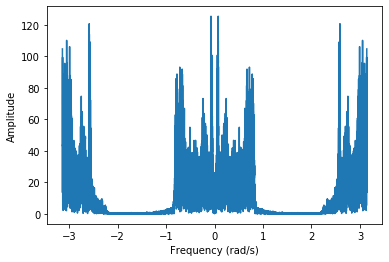

In [67]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### PART B: SAMPLE ONE (TOAD)

sampling rate =  22050
number of samples =  7354


Text(0, 0.5, 'Amplitude')

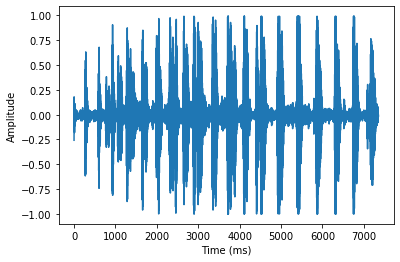

In [57]:
sr, samples = wav_load("toad_fixed.wav")
n = np.arange(0, len(samples))
samples = samples[::2]
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')   
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

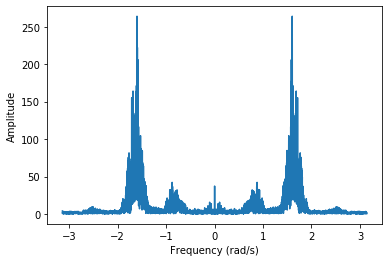

In [58]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### PART B: SAMPLE TWO (BLM)

sampling rate =  22050
number of samples =  12959


Text(0, 0.5, 'Amplitude')

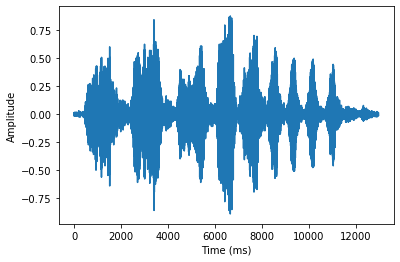

In [68]:
sr, samples = wav_load("blm.wav")
n = np.arange(0, len(samples))
samples = samples[::2]
sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')   
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

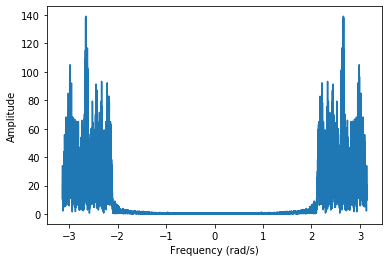

In [69]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### PART C: SAMPLE 1 (TOAD)

C:\Users\cryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


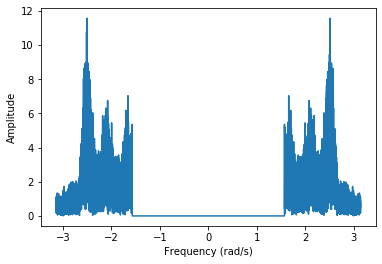

In [70]:
sr, samples = wav_load("toad_fixed.wav")
sample_fft = fftpack.fft(samples)
sample_fftshift = fftpack.fftshift(sample_fft)
w_fft = np.linspace(0, 2 * np.pi, len(samples))
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fc = 0.25
cu = int (len(samples) * fc)
center = int(len(samples)/2)
sample_fftshift[center-cu:center+cu] = 0
plt.plot(w_fftshift, np.abs(sample_fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')
sample_filtered = 30 * fftpack.ifft(sample_fftshift)
sa.play_buffer((sample_filtered * 32767).astype('int16'), 1, 2, sr).wait_done()

### PART C: SAMPLE 2 (BLM)

C:\Users\cryst\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


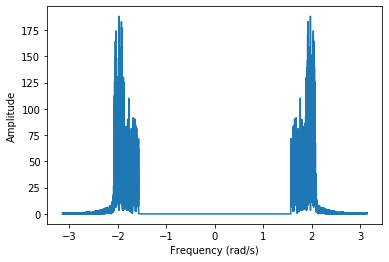

In [63]:
sr, samples = wav_load("blm.wav")
sample_fft = fftpack.fft(samples)
sample_fftshift = fftpack.fftshift(sample_fft)
w_fft = np.linspace(0, 2 * np.pi, len(samples))
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fc = 0.25
cu = int (len(samples) * fc)
center = int(len(samples)/2)
sample_fftshift[center-cu:center+cu] = 0
plt.plot(w_fftshift, np.abs(sample_fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')
sample_filtered = fftpack.ifft(sample_fftshift)
sa.play_buffer((sample_filtered * 32767).astype('int16'), 1, 2, sr).wait_done()

sampling rate =  22050
number of samples =  25917


Text(0, 0.5, 'Amplitude')

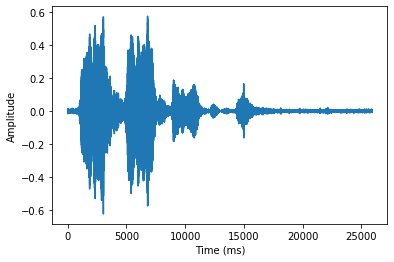

In [64]:
samples = sample_filtered
print('sampling rate = ', sr)
print('number of samples = ', len(samples))
plt.plot(samples)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

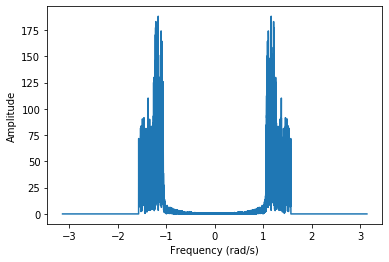

In [65]:
w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
fftshift = fftpack.fftshift(fftpack.fft(samples))
plt.plot(w_fftshift, np.abs(fftshift))
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Amplitude')

### Discussion 3
#### Expected Value of Frequency Content
The frequency values here shown are in line with our expectations
The tiger roar is a very deep, bassy sound, which would be associated with a low frequency components.
The toad sound was a bit surprising to see that it was composed largely of a single frequency, though it is high as you would expect.
The bird sound is also within expectation, since it sounds like it has a mix of high and low frequency components.
One observation we had about the bird noise was that the overall frequency of the signal in the time domain changes over time, there are two distinct parts to the bird song. We hypothesize that if we were to split the song into two parts, the individual frequency components could be more easily seen.
#### Problems Encountered
Our problem for this task was with the ComplexCasting warning, which states that we are discarding the imaginary part of the output signals.
#### Results
We were able to play the audio files using the provided code. We were also able to view the signals in the frequency and time domain using the fourier transform and plotting libraries. We were also able to implement several types of frequency shifting and filtering, and to observe how this affected the signals in the frequency and time domain.
We chose to use the bird noise and the frog noise because they have distinct frequency components.
#### Implementation Details
We imported the songs and read in their sampling frequency and reused the example code to create the numerical range and graph the results. For the high pass filter, we used some array manipulation techniques to zero out the low frequency portion of the signal in the frequency domain, and then took the inverse fft to view how this affected the signal in the time domain.
#### A.
For the frequency shift, we shifted toad up to a higher pitch by setting freq to 0.5 . We also shifted bird down to a lower pitch by setting freq to 0.2. We graphed the results to demonstrate the change in the frequency component. It was found that shifting the frequency down made the sample sound "deeper", and shifting the frequency up increased the pitch of the audio sample.
#### B.
For part b, we applied the time scaling. By reducing the number of samples, we increased the frequency of the sample. This had the effect of increasing the pitch, as well as reducing the length of the sample in the time domain.
#### C.
For part c, we were able to implement the high pass filter using some array manipulation. For the bird sound, this had the effect of removing the low frequency portion almost entirely. Since the low frequency component occurs at a distinct point in time, it is interesting to see that the bird song has been silenced for that portion of time as well. 
The toad sound is less interesting, since removing the low frequency component has an unknown effect that removes a lot of energy from the sample. Only a very small component remains in the higher frequencies, and it needs to be amplified in order to be heard.
